### Task 1: Visualization Human Mobility data from GeoDS Lab

In [4]:
import pandas as pd
import numpy as np
import wget, os, json
import geopandas as gpd
import matplotlib.pyplot as plt

Data loaded from SafeGraph GeoDS@UW-Madison Lab - <a href = "https://github.com/GeoDS/COVID19USFlows"> GitHub </a>

In [51]:
# checks the file and download if it not present in the path

file = "weekly_ct2ct_2021_07_05_0.csv"
if not os.path.exists(file):
    url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2021/master/weekly_flows/ct2ct/2021_07_05/weekly_ct2ct_2021_07_05_0.csv"
    wget.download(url)
else:
    print(f"file exists in path:{os.getcwd()}+\+{file}")

file exists in path:C:\Users\Sidrcs\Documents\Github\Geospatial_BigData_Analytics\BigdataVisualization+\+weekly_ct2ct_2021_07_05_0.csv


In [6]:
# read and display the downloaded csv
flow_df = pd.read_csv("weekly_ct2ct_2021_07_05_0.csv")
flow_df.head()

For visualization in <a href = "https://kepler.gl/demo"> kepler.gl </a>, preprocessing SafeGraph data. Also, finding unique and most frequent geoid origin through <code>value_counts()</code> method. For the given dataset, it is based in <b> Orange county, FL</b>. Therefore, the origin geoid is <code>12095017103</code>

In [11]:
flow_df.geoid_o.value_counts()

12095017103    2438
48157673101    2026
48439114103    1490
48339692001    1438
48157673200    1366
               ... 
1047957200       31
1097007700       30
23009966400      28
1087231700       14
2188000200       11
Name: geoid_o, Length: 2179, dtype: int64

In [12]:
flow_df.dtypes # determines data types present

geoid_o                             int64
geoid_d                             int64
lng_o                             float64
lat_o                             float64
lng_d                             float64
lat_d                             float64
number_devices_primary_daytime      int64
date_range                         object
visitor_flows                       int64
pop_flows                         float64
dtype: object

In [27]:
# type casting origin county and destination geoids to string
flow_df['geoid_o']=flow_df['geoid_o'].apply(lambda x: str(x).zfill(11))
flow_df['geoid_d']=flow_df['geoid_d'].apply(lambda x: str(x).zfill(11))

In [28]:
# to confirm conversion
flow_df.dtypes

geoid_o                            object
geoid_d                            object
lng_o                             float64
lat_o                             float64
lng_d                             float64
lat_d                             float64
number_devices_primary_daytime      int64
date_range                         object
visitor_flows                       int64
pop_flows                         float64
dtype: object

In [29]:
flow_df.head(5)

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,number_devices_primary_daytime,date_range,visitor_flows,pop_flows
0,01001020100,01001020100,-86.490076,32.477185,-86.490076,32.477185,227,07/05/21 - 07/11/21,74,691.0
1,01001020100,01001020200,-86.490076,32.477185,-86.473375,32.474248,227,07/05/21 - 07/11/21,70,654.0
2,01001020100,01001020300,-86.490076,32.477185,-86.460190,32.475428,227,07/05/21 - 07/11/21,156,1458.0
3,01001020100,01001020400,-86.490076,32.477185,-86.443624,32.472001,227,07/05/21 - 07/11/21,91,850.0
4,01001020100,01001020500,-86.490076,32.477185,-86.422661,32.458833,227,07/05/21 - 07/11/21,425,3973.0


Slicing the data from one origin geoid to several destination geoids based most frequent origin geoid in the dataset. It is in Orange county, FL

In [42]:
# slicing flow_df based on geoid_o and geoid_d
one_flow_df = flow_df[(flow_df["geoid_o"].str.startswith("12095016902")) & flow_df["geoid_d"].str.startswith("12095")]

In [43]:
# exporting to csv for Kepler.gl visualization
one_flow_df.to_csv('Kepler_viz_data.csv')

### Arc lines are based on population flow between origin geoid and destination geoids in Orange county, FL

<img src = "https://github.com/Sidrcs/Geospatial_BigData_Analytics/blob/main/BigdataVisualization/CensusTractFlowViz.png?raw=true"></img>

### Task 2: Using pydeck to visualize SafeGraph human mobility flow data

In [5]:
import pydeck as pdk
import pandas as pd

# data from URL mentioned in task 1
data = r"weekly_ct2ct_2021_07_05_0.csv"

# visual bounding box range of northeast longitude and latitude, southwest longitude and latitude
bbox = [-81.5,28.5,-80,30.5]

# function to determine if the lng_o, lat_o is in bbox range
def in_bounding_box(point):
    lng, lat = point
    in_lng_bounds = bbox[0] <= lng <= bbox[2]
    in_lat_bounds = bbox[1] <= lat <= bbox[3]
    return in_lng_bounds and in_lat_bounds

# read csv data
df = pd.read_csv(data)
df.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,number_devices_primary_daytime,date_range,visitor_flows,pop_flows
0,1001020100,1001020100,-86.490076,32.477185,-86.490076,32.477185,227,07/05/21 - 07/11/21,74,691.0
1,1001020100,1001020200,-86.490076,32.477185,-86.473375,32.474248,227,07/05/21 - 07/11/21,70,654.0
2,1001020100,1001020300,-86.490076,32.477185,-86.460190,32.475428,227,07/05/21 - 07/11/21,156,1458.0
3,1001020100,1001020400,-86.490076,32.477185,-86.443624,32.472001,227,07/05/21 - 07/11/21,91,850.0
4,1001020100,1001020500,-86.490076,32.477185,-86.422661,32.458833,227,07/05/21 - 07/11/21,425,3973.0


In [184]:
# testing function if it returns true or false
in_bounding_box([-81,30])

True

In [185]:
# restrict longitude, latitude based on bbox range
df = df[df[["lng_o", "lat_o"]].apply(lambda row: in_bounding_box(row), axis=1)]
df = df[df[["lng_d", "lat_d"]].apply(lambda row: in_bounding_box(row), axis=1)]
df.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,number_devices_primary_daytime,date_range,visitor_flows,pop_flows
106925,12035060304,12035060106,-81.148074,29.446423,-81.199675,29.624888,132,07/05/21 - 07/11/21,29,456.0
106929,12035060304,12109021301,-81.148074,29.446423,-81.337244,29.845330,132,07/05/21 - 07/11/21,20,314.0
106932,12035060304,12109020400,-81.148074,29.446423,-81.314830,29.884354,132,07/05/21 - 07/11/21,4,62.0
106933,12035060304,12109020500,-81.148074,29.446423,-81.299035,29.887330,132,07/05/21 - 07/11/21,4,62.0
106934,12035060304,12109020901,-81.148074,29.446423,-81.422316,29.996587,132,07/05/21 - 07/11/21,8,125.0


<code>pdk.Layer()</code> generates arc layers (flow lines) between origin and destination points. There are parameters within <code>pdk.Layer()</code> method that customizes arc lines. <code>pdk.ViewState()</code> showcases display parameters of interactive HTML map. And <code>pdk.Deck()</code> binds the hover popup to the map. Lastly, <code>to_html()</code> creates a stand-alone HTML file and save it to the path.

In [189]:
# band colors for arc lines
green_band = [0, 255, 0, 40]
red_band = [240, 100, 0, 40]

# specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df, # loaded dataframe within bbox view
    get_width="2", # width of each arc
    get_source_position=["lng_o", "lat_o"], # specific origin longitude, latitude
    get_target_position=["lng_d", "lat_d"], # specific destination longitude, latitude
    get_tilt=15, # determines the title of arc
    get_source_color=green_band, # color for origin arc
    get_target_color=red_band, # color for destination arc
    pickable=True,
    auto_highlight=True,
)

# determine display parameters
view_state = pdk.ViewState(latitude=29, longitude=-80.5, bearing=45, pitch=50, zoom=7)

# text to displayed on hover
text = {"html": "{visitor_flows} visitors <br /> commuter origin is red; commuter destination is green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=text)

# renders interactive HTML 
r.to_html("arc_layer.html")

### Task 3: Using DataShader create a population density map of Madison, WI

In [6]:
# load all required libraries
import functools
import colorcet
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9

In [8]:
df = pd.read_csv(r"census-midwest.csv")

In [10]:
df.head()

,west,north,race
0,-11443499.0,5927269.0,w
1,-11443482.0,5927260.0,w
2,-11443420.0,5927274.5,w
3,-11443353.0,5927362.0,w
4,-11443336.0,5927350.0,w


In [12]:
USA           = ((-124.72,  -66.95), (23.55, 50.06))
LakeMichigan  = (( -91.68,  -83.97), (40.75, 44.08))
Chicago       = (( -88.29,  -87.30), (41.57, 42.00))
Chinatown     = (( -87.67,  -87.63), (41.84, 41.86))
NewYorkCity   = (( -74.39,  -73.44), (40.51, 40.91))
LosAngeles    = ((-118.53, -117.81), (33.63, 33.96))
Houston       = (( -96.05,  -94.68), (29.45, 30.11))
Austin        = (( -97.91,  -97.52), (30.17, 30.37))
NewOrleans    = (( -90.37,  -89.89), (29.82, 30.05))
Atlanta       = (( -84.88,  -84.04), (33.45, 33.84))
Madison       = (( -89.60,  -89.21), (43.00, 43.14))

from datashader.utils import lnglat_to_meters as webm
x_range,y_range = [list(r) for r in webm(*USA)]

plot_width  = int(900)
plot_height = int(plot_width*7.0/12)

In [13]:
background = "black"

In [15]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.display import HTML, display

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container { width:100% !important; }</style>"))

In [30]:
cvs = ds.Canvas(plot_width, plot_height, *webm(*USA))
agg = cvs.points(df, 'west', 'north')

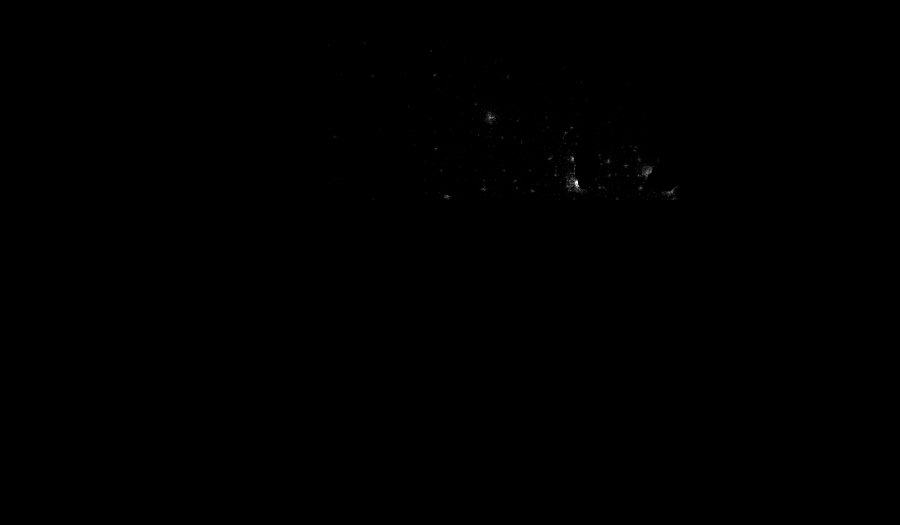

In [31]:
export(tf.shade(agg, cmap = cm(Greys9), how='linear'),"census_gray_linear")

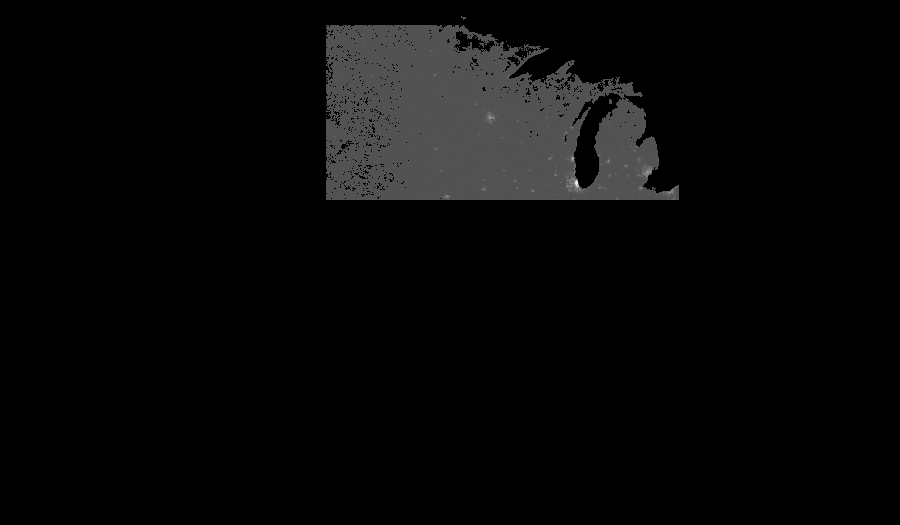

In [32]:
export(tf.shade(agg, cmap = cm(Greys9,0.25), how='linear'),"census_gray_linear")

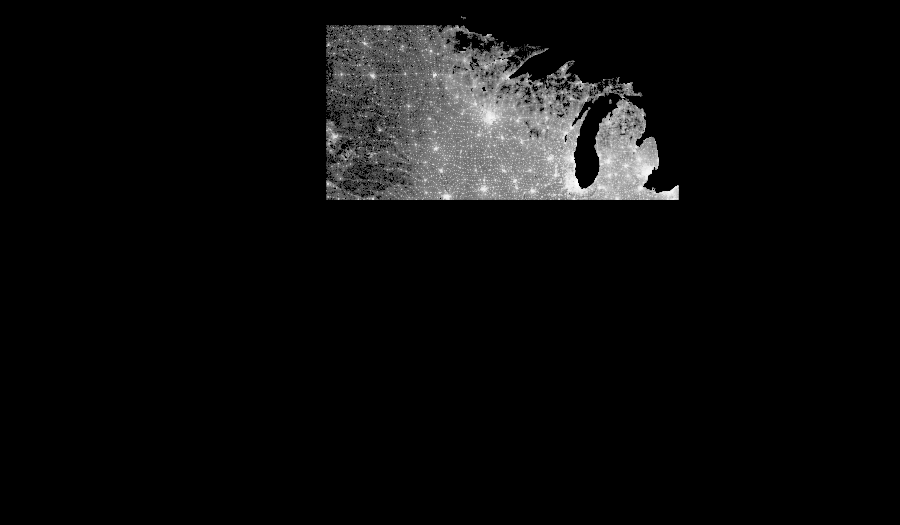

In [33]:
export(tf.shade(agg, cmap = cm(Greys9,0.2), how='log'),"census_gray_log")

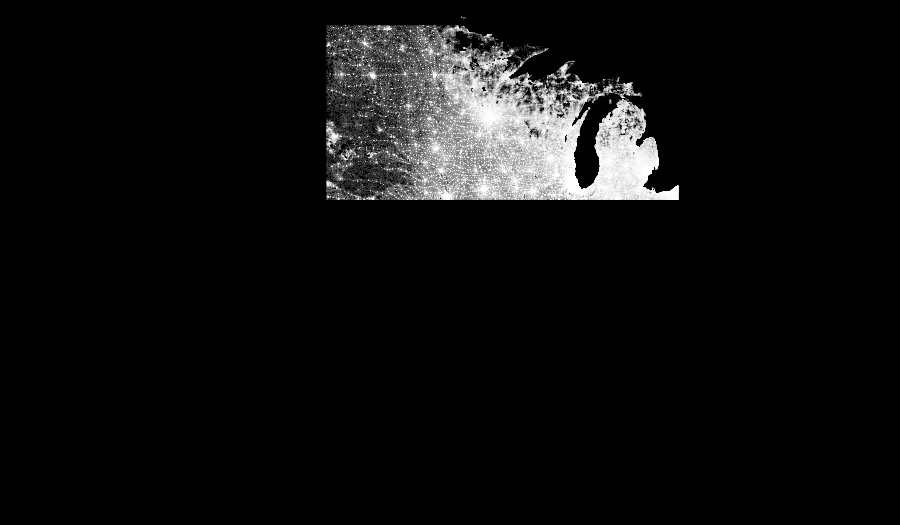

In [34]:
export(tf.shade(agg, cmap = cm(Greys9,0.2), how='eq_hist'),"census_gray_eq_hist")

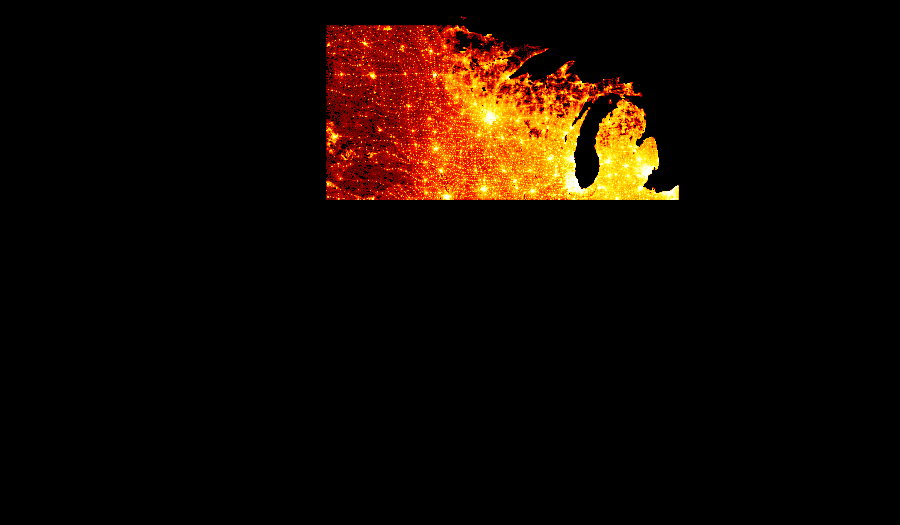

In [35]:
from colorcet import fire
export(tf.shade(agg, cmap = cm(fire,0.2), how='eq_hist'),"census_ds_fire_eq_hist")

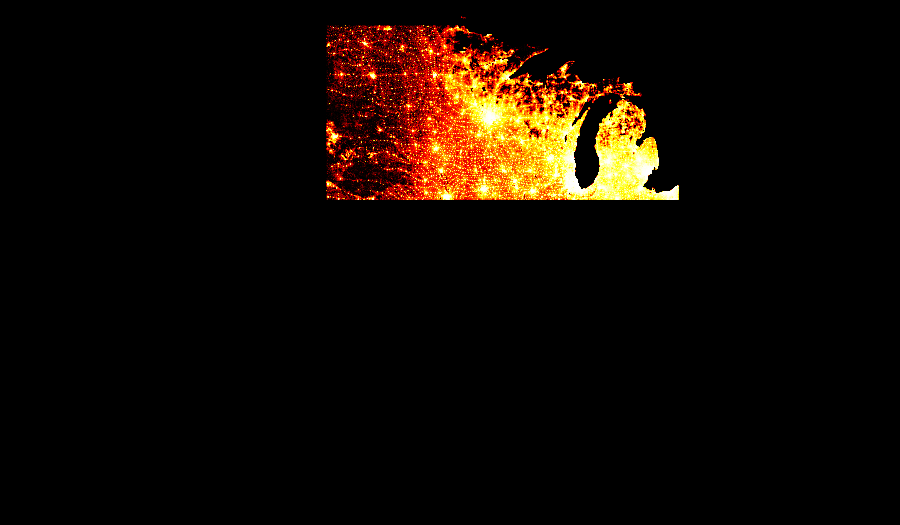

In [36]:
from matplotlib.cm import hot
export(tf.shade(agg, cmap = hot, how='eq_hist'),"census_ds_mhot_eq_hist")

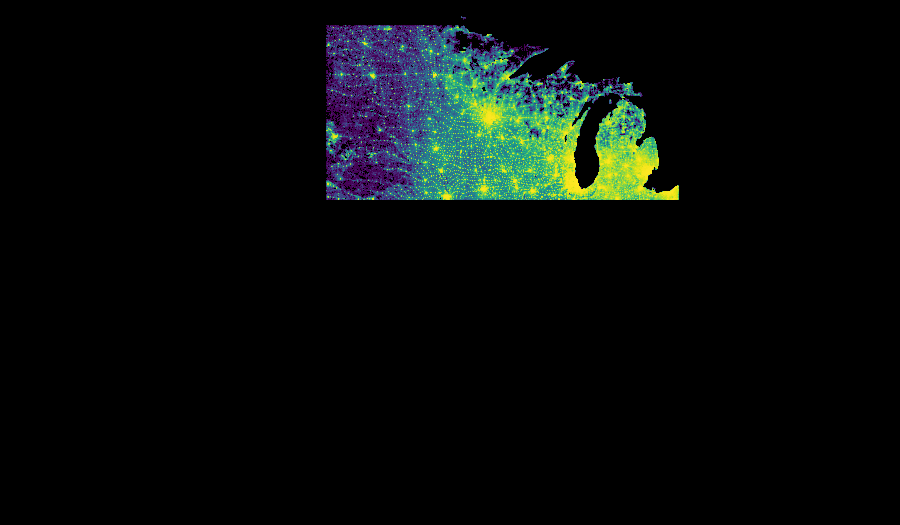

In [37]:
from datashader.colors import viridis
export(tf.shade(agg, cmap=cm(viridis), how='eq_hist'),"census_viridis_eq_hist")